<ipython-input-2-777cf856d39f>:18: RuntimeWarning: overflow encountered in scalar divide
  return sum((x[i] - (i+1)**2)**2 / P(i+1) for i in range(n))
<ipython-input-2-777cf856d39f>:18: RuntimeWarning: overflow encountered in scalar power
  return sum((x[i] - (i+1)**2)**2 / P(i+1) for i in range(n))
<ipython-input-2-777cf856d39f>:24: RuntimeWarning: overflow encountered in scalar divide
  grad[i] = 2 * (x[i] - (i+1)**2) / P(i+1)
<ipython-input-2-777cf856d39f>:55: RuntimeWarning: invalid value encountered in subtract
  while g(x - alpha * grad) > g(x - (alpha + step) * grad):
<ipython-input-2-777cf856d39f>:44: RuntimeWarning: invalid value encountered in subtract
  x -= alpha * grad


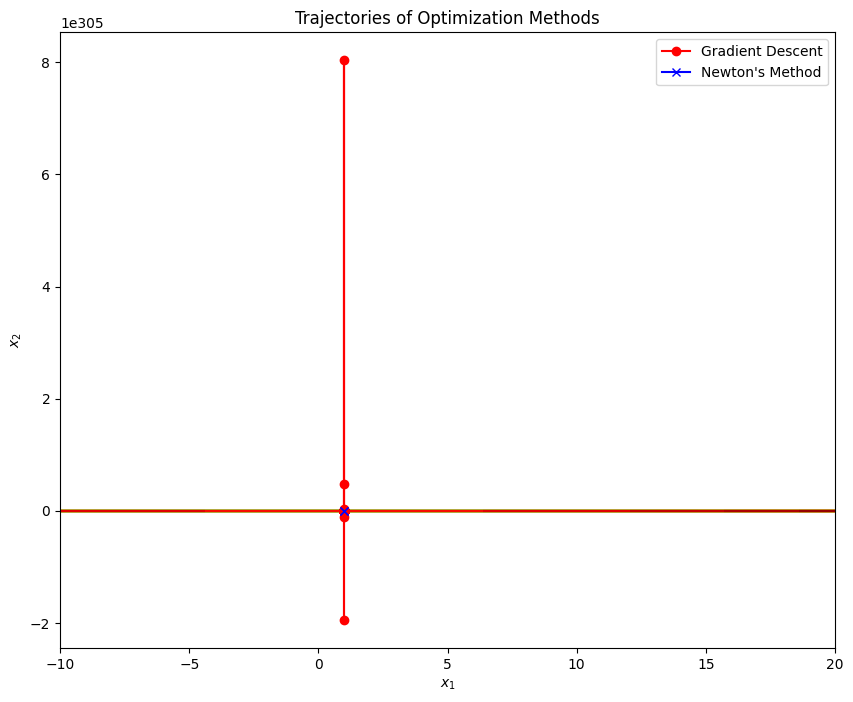

<ipython-input-2-777cf856d39f>:18: RuntimeWarning: overflow encountered in scalar add
  return sum((x[i] - (i+1)**2)**2 / P(i+1) for i in range(n))


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time

# Define the periodic function P(i)
def P(i):
    values = {7: 1/4, 77: 1/16, 222: 1/256, 4444: 1/64}
    period = 4
    i_mod = i % period
    for key, value in values.items():
        if key % period == i_mod:
            return value
    return 1.0  # Default value if not specified

# Define the function g(x), its gradient, and Hessian
def g(x):
    n = len(x)
    return sum((x[i] - (i+1)**2)**2 / P(i+1) for i in range(n))

def grad_g(x):
    n = len(x)
    grad = np.zeros(n)
    for i in range(n):
        grad[i] = 2 * (x[i] - (i+1)**2) / P(i+1)
    return grad

def hessian_g(x):
    n = len(x)
    hess = np.zeros((n, n))
    for i in range(n):
        hess[i, i] = 2 / P(i+1)
    return hess

# Gradient Descent with Exact Line Search
def gradient_descent(x0, tol=1e-15):
    x = x0.copy()
    trajectory = [x.copy()]
    iterations = 0
    start_time = time.time()

    while np.linalg.norm(grad_g(x)) > tol:
        grad = grad_g(x)
        alpha = exact_line_search(x, grad)
        x -= alpha * grad
        trajectory.append(x.copy())
        iterations += 1

    end_time = time.time()
    return x, g(x), iterations, end_time - start_time, trajectory

def exact_line_search(x, grad):
    # Perform exact line search to minimize g(x - alpha * grad)
    alpha = 0.01  # Initial step size
    step = 1e-4   # Small step to find the optimal alpha
    while g(x - alpha * grad) > g(x - (alpha + step) * grad):
        alpha += step
    return alpha

# Newton's Method
def newtons_method(x0, tol=1e-15):
    x = x0.copy()
    trajectory = [x.copy()]
    iterations = 0
    start_time = time.time()

    while np.linalg.norm(grad_g(x)) > tol:
        grad = grad_g(x)
        hess = hessian_g(x)
        x -= np.linalg.solve(hess, grad)
        trajectory.append(x.copy())
        iterations += 1

    end_time = time.time()
    return x, g(x), iterations, end_time - start_time, trajectory

# Visualization for n = 2
def plot_trajectories(trajectory_gd, trajectory_nm):
    x1 = np.linspace(-10, 20, 400)
    x2 = np.linspace(-10, 20, 400)
    X1, X2 = np.meshgrid(x1, x2)
    Z = np.array([[g(np.array([x1, x2])) for x1, x2 in zip(row_x1, row_x2)] for row_x1, row_x2 in zip(X1, X2)])

    plt.figure(figsize=(10, 8))
    plt.contour(X1, X2, Z, levels=50, cmap='jet')

    # Plot Gradient Descent trajectory
    gd_x = np.array(trajectory_gd)
    plt.plot(gd_x[:, 0], gd_x[:, 1], 'o-', label='Gradient Descent', color='red')

    # Plot Newton's Method trajectory
    nm_x = np.array(trajectory_nm)
    plt.plot(nm_x[:, 0], nm_x[:, 1], 'x-', label="Newton's Method", color='blue')

    plt.title('Trajectories of Optimization Methods')
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')
    plt.legend()
    plt.show()

# Run experiments for different n values
n_values = [2, 20, 200, 2000, 5000, 10000, 15000, 20000, 30000, 50000, 100000, 200000]
results = []

for n in n_values:
    x0 = np.array([i + 1 for i in range(n)], dtype=float)

    # Gradient Descent
    x_gd, g_gd, iter_gd, time_gd, traj_gd = gradient_descent(x0)

    # Newton's Method
    x_nm, g_nm, iter_nm, time_nm, traj_nm = newtons_method(x0)

    results.append((n, x_gd, g_gd, iter_gd, time_gd, x_nm, g_nm, iter_nm, time_nm))

    if n == 2:
        plot_trajectories(traj_gd, traj_nm)

# Print results
for res in results:
    print(f"n = {res[0]}:\n Gradient Descent: {res[3]} iterations, {res[4]:.4f}s, g(x) = {res[2]:.6f}\n Newton's Method: {res[7]} iterations, {res[8]:.4f}s, g(x) = {res[6]:.6f}\n")
